In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack

In [2]:
plt.rcParams.update({'font.size': 22})
plt.rcParams['lines.linewidth'] = 3
pi=np.pi

# Laboratory 3 - Background and Resources


## What are natural frequencies

In free vibration (i.e., no external forcing), structural components
oscillate at frequencies that are dictated by their geometry and material properties. Since
these vibrations occur in the absence of a driving force, the associated frequencies are referred
to as _natural frequencies_. They describe how the system vibrates if left to
behave on its own. In contrast, driven linear systems vibrate at the
driving frequency. An amplification of the response (called resonance)
occurs when the driving frequency coincides with one of the natural
frequencies. In short, the system is driven at a frequency at which it
likes to vibrate. Large amplitude oscillations are the result. So it is
important to know what the natural frequencies are *a priori* so you can
avoid driving the system into resonance.

## Determining natural frequencies

In this lab, you will measure the first 3 natural frequencies, $\omega_n$, of a rectangular beam using strain gauge data. 
Your goal is 
to measure the free response time series data using a strain gauge. With this data, you will
determine the first natural frequency in two ways: 

- (i) by peak counting in the time domain (which gives a very rough estimate of $\omega_n$)
- (ii) by a formal frequency domain analysis, using the [fast Fourier transform](https://en.wikipedia.org/wiki/Fast_Fourier_transform) (FFT). 

For a rectangular beam, analytic expressions of the natural frequencies exist,
and you can confirm that you're doing everything properly by getting the
analytical frequencies to agree with the experimental frequencies.

# The Euler-Lagrange dynamic beam equation

In lab 2, we used the Euler-Bernoulli static beam equation to describe deflection of a cantilever beam under a static load. Here, we will use the Euler-Lagrange dynamic beam equation to account for inertial effects. The Euler-Lagrange beam equation relates bending stiffness and density:

$\frac{\partial^2}{\partial x^2}\left(EI\frac{\partial^2 w}{\partial
x^2}\right)=-\mu\frac{\partial^2 w}{\partial^2 t} +q(x,t)$  (1)

where $E$ is the Young's modulus of the beam, $I$ is the second moment of area of the beam's cross-section, $\mu$ is the mass per unit length of the beam, $q(x,t)$ is the applied load, and $w=w(x,t)$ is the displacement of the neutral axis that is a function of $x$ - position along the beam - and $t$ - time. 

Because vibration at natural frequencies occurs in the absence of a driving force, we set the applied load $q(x,t)$ to zero. If the cross-sectional geometry is constant and the material is homogeneous, Equation 1 becomes:

$EI\frac{\partial^4 w}{\partial
x^4}=-\mu\frac{\partial^2 w}{\partial^2 t}$.  (2)

The full solution requires evaluation of the partial differential equation. We will use the derived mode shapes and natural frequencies for a cantilever beam [\[1\]](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory#Example:_Cantilevered_beam). The solution for $w(x,t)$ is:

$w(x,t)=\sum_{n=1}^{\infty}(A_{n}\cos\omega_{n}t+B_{n}\sin\omega_{n}t)
\left(\cosh\beta_n x-\cos\beta_n x+
\frac{\cos\beta_n L + \cosh\beta_n L}{\sin\beta_n L+\sinh\beta_n L}
\left(\sin\beta_n x -\sinh\beta_n x\right)\right)$   (3)

where the formula $\cosh(\beta_n L)\cos(\beta_n L) +1 =0$ defines the constants $\beta_n$, $L$ is the length of the beam, and $A_n$ and $B_n$ are constants derived from initial conditions. In the experiment, you will deliver an impulse to the cantilever specimens. An impulse will only require $\sin(t)$ components, so $A_n=0$ for all $n$. 

# The natural frequencies of a cantilevered beam

Structures and components vibrate in a combination of different patterns, simultaneously. These patterns are called _modes_ of vibration. Theoretically, there is an infinite number of vibration modes for a coninuous system - each oscillating at higher and higher frequencies with lower and lower amplitudes. Each mode corresponds to an $n$ in equation 3 - the sum of all $n$ modes is the displacement of the beam over time. Practically, we are usually interested in the first few modes of a system, corresponding to the lowest frequencies and highest amplitudes. Below is a depiction of the first three vibration modes of a cantilevered beam [2]. For an impulse excitation, our beams will be oscillating in a combination of all three patterns (as well as higher, less-detectable modes).

![Mode Shapes](https://raw.githubusercontent.com/cooperrc/sensors_and_data/master/ME3263-Lab_03/Mode-shapes.png)

_Figure 1: First three mode shapes of a cantilevered beam_

The natural frequencies can be calculated by:

$\omega_i=\beta_i^2\sqrt{\frac{EI}{\bar{m}L^4}}$ (4)

where the $i^{th}$ natural frequency, $\omega_i$, is given in rad/s.  $\bar{m}$ is the mass per unit length of the beam, $E$ is the Young's modulus of the material, and $\beta_i$ is a constant corresponding to the $i^{th}$ natural frequency and vibration mode: $\beta_1=1.875104$, $\beta_2=4.694091$, $\beta_3=7.854757$, $...$ 

## Example Problem 1

What are the first three natural frequencies of a steel beam that is 2 mm x 6 mm x 300 mm (in Hertz)? You will need to look up the density and Young's modulus for steel. Use the constants for the first three $\beta_i$ given above. Be sure to convert your answer from rad/s to Hz (i.e., cycles/s).

In [3]:
# your work here



# Measuring vibration

Measuring vibrational modes has two components, the frequency and the amplitude. The amplitude of vibration can be determined by taking the difference between the maximum and minimum measurements. The frequency can be estimated by counting the number of peaks (complete cycles) in a given period. While this can be a fairly accurate estimate for the first vibration mode (if the data is reliable), we will see later that more exact methods are available to discover vibrational frequencies more accurately.

You may count the peaks directly in your output spreadsheet (from LabView), or you may import your data into Python to examine using the `%matplotlib notebook` tool

In [4]:
%matplotlib notebook

Below, we load example strain gauge data into the notebook and plot the strain gage readings over the course of the experiment. 

<IPython.core.display.Javascript object>


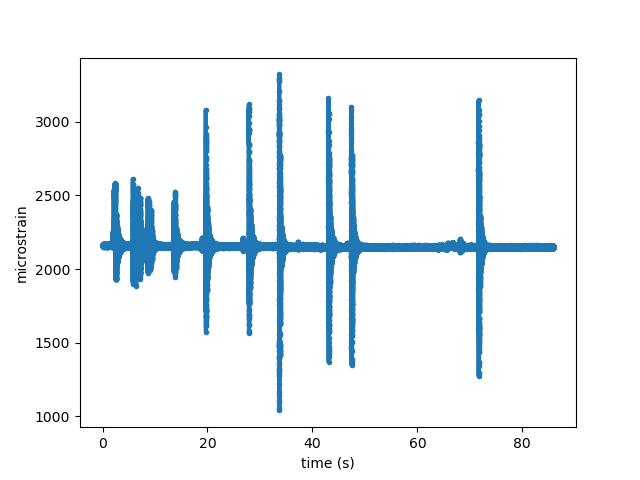

Text(0, 0.5, 'microstrain')

In [5]:
data=np.loadtxt('./steel_700Hz.lvm',delimiter='\t')
t=data[:,0]
y=data[:,1]

plt.figure()
plt.plot(t,y,'.-')
plt.xlabel('time (s)')
plt.ylabel('microstrain')

Now, you are able to zoom, translate, and even get cursor locations in the graph. 

## Example Problem 2

Try zooming in on one of the spikes - you will see each spike is an impulse and decaying vibrations. You can estimate the first natural frequency by counting the peaks and dividing by the elapsed time. 

$f_1 = \frac{\#~cycles}{\Delta t}$

# Sampling rate and the Nyquist frequency

When measuring frequency by digital (i.e., discrete) sampling methods, we must be careful of the frequency at which we take our samples. Below is a simple 1 Hz (2$\pi$ rad/s) oscillating signal. The first variable in the code block, `N`, dictates how many samples we take over the 10 seconds of oscillation. Play with this value, setting it to both low and high sample rates. We can see that if we drop the number of samples below 20 (i.e., drop the sample rate below 2 Hz), we are no longer able to reliably identify the frequency of the signal.

<IPython.core.display.Javascript object>


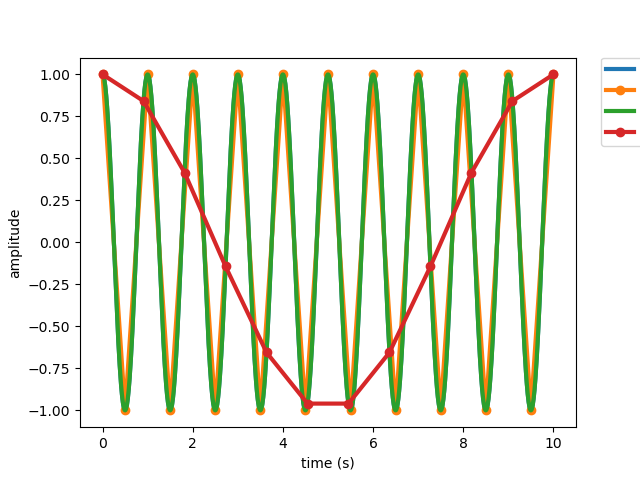

Text(0, 0.5, 'amplitude')

In [6]:
N=20
t_collect=10 # time to collect data
t=np.linspace(0,t_collect,1000)
y=np.cos(2*pi*t)
tsample=np.linspace(0,10,N+1)
ysample=np.cos(2*pi*tsample)
plt.figure(20)
plt.plot(t,y,label='signal')
plt.plot(tsample,ysample,'o-',label='measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

For N=20, it would appear that we can capture a minimal example of our signal (just the peaks occuring at 1 Hz). Collecting data for N=20 over 10 seconds is equivalent to sampling at 20 samples/10 seconds = 2 Hz. This is called the Nyquist rate:

$f_{Nyquist}=2f_{signal}$. (5)

In Equation 5, the Nyquist rate (also called Shannon Sampling) [3,4], $f_{Nyquist}$, is the _minimum sampling rate_ necessary to capture the signal at frequency, $f_{signal}$. Try changing N<20 and consider the apparent signal frequencies. 

If you try N=11 in the Python code below, you will see a phenomenon called _aliasing_ or the "wagon-wheel effect" [\[5\]](http://www.onmyphd.com/?p=aliasing). When you look at the measured signal, it appears to have a frequency of 1 cycle/10 seconds = 0.1 Hz. This phenomenon is called the wagon-wheel effect because it is noticeable when recording spinning objects like a wagon wheel [or turbine](https://www.youtube.com/watch?v=vIsS4TP73AU). The wheel spins at a given frequency and the camera records at another frequency. When the ratio of the wheel frequency to camera recording frequency reaches certain values the wheel appears to stop, spin slower, or even spin backwards. 

In [7]:
N=11
t_collect=10 # time to collect data
t=np.linspace(0,t_collect,1000)
y=np.cos(2*pi*t)
tsample=np.linspace(0,10,N+1)
ysample=np.cos(2*pi*tsample)
plt.figure(20)
plt.plot(t,y,label='signal')
plt.plot(tsample,ysample,'o-',label='measure')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('time (s)')
plt.ylabel('amplitude')

Text(22.097222222222214, 0.5, 'amplitude')

Experimentally, we avoid aliasing by sampling above the Nyquist rate from equation 5. The result is that we cannot trust measured frequencies below half of the sampling frequency. This poses a chicken and the egg problem. _In order to measure the frequency, we need to  double the measured frequency and measure the frequency again_. 

# The fast Fourier transform (FFT)

The Fourier transform takes a function that is expressed in terms of time or space, and decomposes it into a form that is expressed in terms of frequency. In other words, for a signal that is periodic in time, the Fourier transform will tell you the frequencies that make up the signal as well as the "power" of each frequency.

For example, consider the periodic signal shown below. It is a combination of three sinusoids - one oscillating at 5 Hz, one at 8 Hz, and one at 16 Hz.

(-5.0, 5.0)

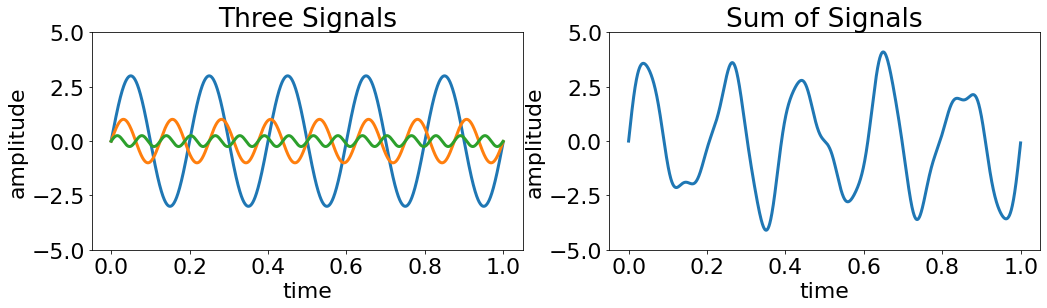

In [3]:
# Number of samples
Ns = 2000
# sampling period
ts = 1.0/Ns
# sampling rate (here, it is over one second)
Sr = Ns/1.0
#time vector of sampling points for a 1 second sample
t = np.arange(0,1,ts) 

# creating three sinusoids, adding them together
freq = 5. 
x1 = 3*np.sin(2*pi*freq*t)       #with an amplitude of 3

freq = 8
x2 = np.sin(2*pi*freq*t)         #with an amplitude of 1

freq = 16   
x3 = 0.25* np.sin(2*pi*freq*t)   #with an amplitude of 0.25

x = x1 + x2 + x3                 #the sum of the signals

figure, axis = plt.subplots (1,2)
figure.set_figwidth(17)

axis[0].plot(t,x1,t,x2,t,x3)
axis[0].set_title('Three Signals')
axis[0].set_xlabel('time')
axis[0].set_ylabel('amplitude')
axis[0].set_ylim([-5,5])

axis[1].plot(t,x)
axis[1].set_title('Sum of Signals')
axis[1].set_xlabel('time')
axis[1].set_ylabel('amplitude')
axis[1].set_ylim([-5,5])

Taking the Fourier transform of the summed signal will tell us the consituent frequencies and corresponding amplitudes of the components that make up the signal.


### Python FFT

The __fast Fourier transform__ (FFT) is a numerical implementation of the Fourier transform for discrete data [\[6\]](./cooley_and_tukey-FFT.pdf). There are versions of the algorithm in both the `numpy` and `scipy` libraries. 



(0.0, 20.0)

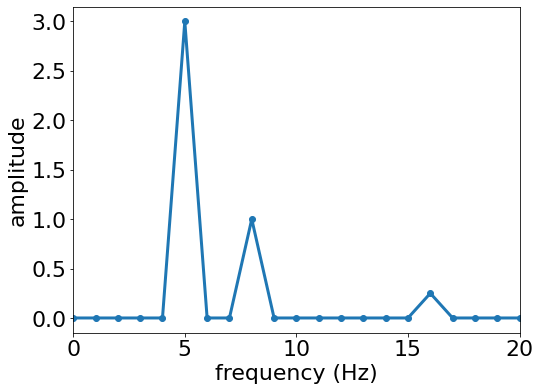

In [4]:
#The FFT algorithm from NumPy
X = np.fft.fft(x)         

#The results need to be normalized by dividing by the number of samples. Additionally, the algorithm involves complex  
#numbers and returns spikes resulting from both positive and negative values of our frequencies. This halves the "power" 
#at each spike. We are only interested in the positive (single-sided) result, so we can recover the original amplitude 
#by multiplying by 2. 
X = X*(2/len(x))

#We use the sampling rate (Sr) and number of samples (L) to define the frequency domain. 
L = len(X)
n = np.arange(L)
T = L/Sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.plot(freq, np.abs(X),'o-')
plt.xlabel('frequency (Hz)')
plt.ylabel('amplitude')
plt.xlim(0, 20)


### Mirroring about a central frequency


The above plot has been artificialy cut short at 20 Hz. If you'd like, you may comment out the final line `plt.xlim(0,20)` to see the whole plot. You will see the results are mirrored around 1000 Hz - our sampling rate divided by two. It will be clearer if you examine the end of the plot - `plt.xlim(1980, 2000)`. This is an effect of the complex exponentials involved in the FFT. It also means that, as a rule of thumb, __do not trust__ any peaks you find above $f_{sampling}/2$.


### MATLAB FFT

The FFT can also be implemented via [MATLAB](https://www.mathworks.com/help/matlab/ref/fft.html). The process is nearly identical, but with the added advantages of visible workspace data, easily edited figures, and readily available help documentation (just type help fft in the command windo). Please see the examples at the above link.

### Example Problem 3

Take the Fourier transform of a function $\sin(2\pi t)$ recorded for 10 seconds. Plot the results for:

a. N=20

b. N=30

c. N=40

You should see a spike at 1 Hz for all sample rates (corresponding to the signal frequency), and a second spike that moves with increasing sample rate.

In [10]:
# your work here


# References

1. [https://en.wikipedia.org/wiki/Euler-Bernoulli_beam_theory](https://en.wikipedia.org/wiki/Euler%E2%80%93Bernoulli_beam_theory#Example:_Cantilevered_beam)

1. Zai, B., Ahmad, F., Lee, C., Kim, T. & Park, M.. (2011). Structural Optimization of Cantilever Beam in Conjunction with Dynamic Analysis. Journal of the Korean Institute of Gas. 15. 31-36. 

1. Jerri, A. J. (1977). The Shannon sampling theorem—Its various extensions and applications: A tutorial review. Proceedings of the IEEE, 65(11), 1565-1596.

1. Nyquist, H. (1928). Certain topics in telegraph transmission theory. Transactions of the American Institute of Electrical Engineers, 47(2), 617-644.

1. [http://www.onmyphd.com/?p=aliasing](http://www.onmyphd.com/?p=aliasing)

1. Cooley, J. W., & Tukey, J. W. (1965). An algorithm for the machine calculation of complex Fourier series. Mathematics of computation, 19(90), 297-301.

1. Harris, F. J. (1978). On the use of windows for harmonic analysis with the discrete Fourier transform. Proceedings of the IEEE, 66(1), 51-83.